In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob

In [6]:
cd /Users/leayamashiro/FFC_4

/Users/leayamashiro/FFC_4


In [7]:
phases = ['/Users/leayamashiro/FFC_4/data/obs_042424/Phase1', '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [8]:
# reminder of index setup from collection 
table

,Unnamed: 0,L,B,RA,DEC,Galactic_Index
0,0,124.4,20.0,23.851192,82.746098,168
1,1,124.4,23.4,32.778248,86.042542,169
2,2,129.0,20.0,52.084066,80.962227,180
3,3,133.6,20.0,69.006710,77.908980,192
4,4,129.0,23.4,69.993942,83.367395,181
...,...,...,...,...,...,...
319,319,115.2,23.4,309.232324,82.078465,145
320,320,110.6,20.0,312.501293,76.649154,132
321,321,115.2,20.0,326.412516,79.953801,144
322,322,119.8,23.4,334.954938,85.318438,157


In [9]:
# sort files by the original "galactic index" which ordered 
# the coordinates in galactic 
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [116]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

In [85]:
galactic

[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

In [117]:
# shift all da spectra

for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

In [87]:
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(pwr0[i]), 1/3.2))

In [105]:
len(freqs)

2048

(1200.0, 1500.0)

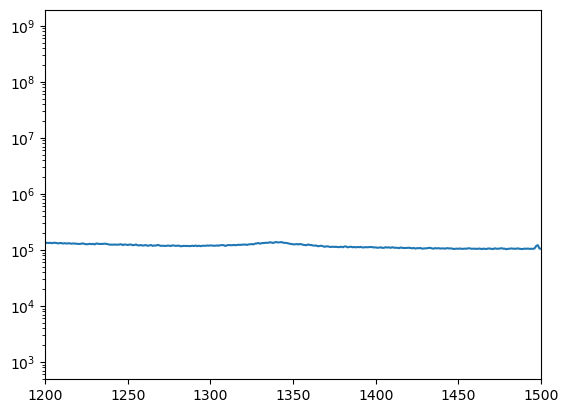

In [102]:
plt.semilogy(pwr0[10])
plt.xlim(1200,1500)
#plt.ylim(1e4, 1e6)

In [110]:
freqs2 = freqs[1000:1500]

In [113]:
for i in range(len(pwr0)):
    pwr0[i] = pwr0[i][1000:1500]

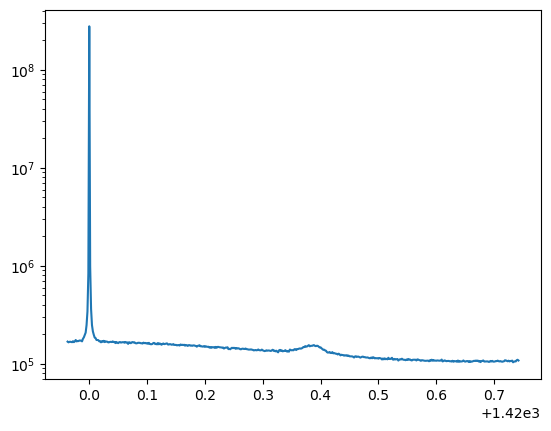

In [118]:
plt.semilogy(freqs2, pwr0[0][1000:1500])